# Discriminate CC1p-detected from CC1p using charge deposition in ROI

In [1]:
import sys; sys.path.insert(0,'../'); 
from ccqe_notebook_tools import *
from tracking_tools import *
%matplotlib inline
# redirect output to the systems standard output 
# sys.stdout = open('/dev/stdout', 'w')

from IPython.core.display import HTML,display
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
File = ROOT.TFile("/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/TracksAnaFiles/Events_MCC7_MC_BNB_2TracksClusters.root")
tree = File.Get("TwoTracksTree")
events = AnalyzeVertex( tree )

## apply the method developed in AssociateHitsTracks for different samples

1 loop, best of 3: 2.82 s per loop
0.768417831556


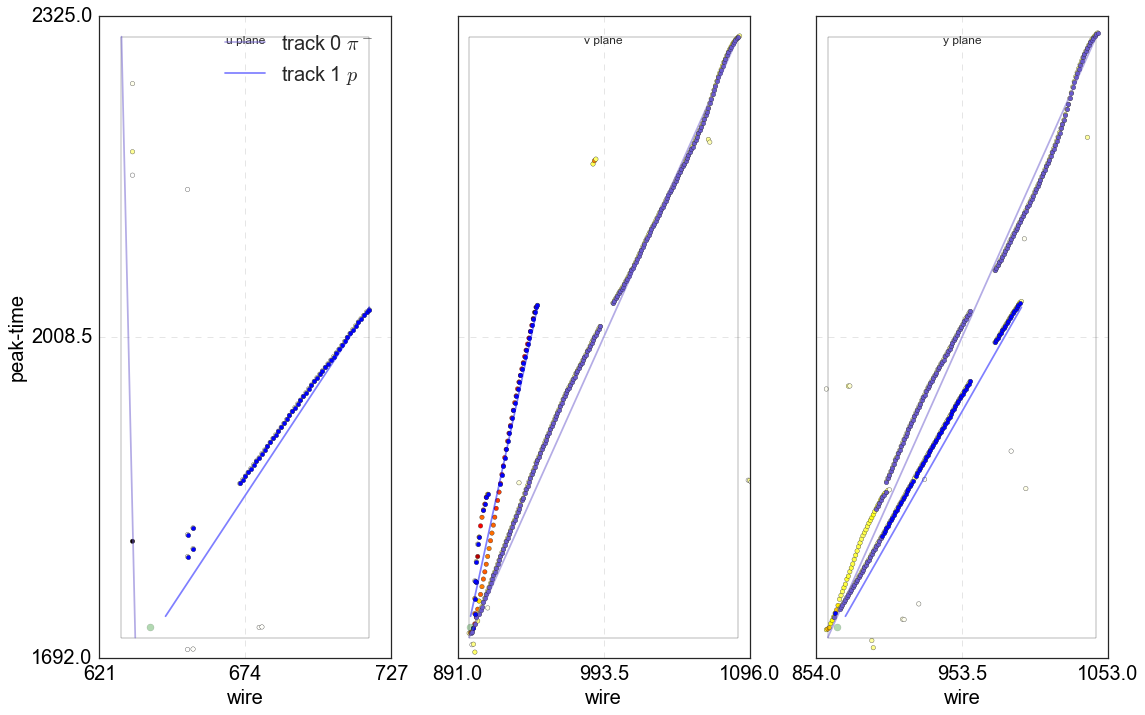

In [3]:
hits, vertex = get_CC1p_tracks_from_rse(events=events, run=6 , subrun=8579 , event=171568)
tracks = [vertex.AssignedMuonTrack , vertex.AssignedProtonTrack]
ratio = get_my_tracks_ratio_charge_in_roi( hits, tracks , debug=0 , planes=[0,1,2], do_plot=True , figsize=(16,10) )
# %timeit get_my_tracks_ratio_charge_in_roi( hits, tracks , debug=0, planes=[0,1,2] )
print ratio

In [ ]:
debug = 0

if debug: print 'ratio_charge_true_cc1p'
ratio_charge_true_cc1p , ratio_charge_NonTrueCC1p1mu1p , ratio_charge_Non1mu1p = [] , [] , []
print 'looping over',events.Nentries,'entries'
for i in range(events.Nentries):
    if debug>1: print i
    if i%(events.Nentries/20)==0 or i%1000==0: 
        print '%.0f'%(100.*float(i)/events.Nentries) + '%'
    hits, TwoTracksClusters = get_CC1p_tracks( events=events, i=i,  debug=debug )
    
    if debug>1: print TwoTracksClusters['Nclusters'],'2-tracks clusters'
    
    for i in range(TwoTracksClusters['Nclusters']):
        vertex = TwoTracksClusters['vertex %d'%i]
        run , subrun , event = vertex.run , vertex.subrun , vertex.event
        if debug: print run , subrun , event 
        
        tracks = [vertex.AssignedMuonTrack , vertex.AssignedProtonTrack]         
        ratio = get_my_tracks_ratio_charge_in_roi( hits, tracks , debug=debug )
        if ratio is np.nan: ratio=0

        if debug: ratio
        if vertex.GENIECC1p:
            ratio_charge_true_cc1p.append(ratio)
        elif vertex.Is1mu1pDetected:
            ratio_charge_NonTrueCC1p1mu1p.append(ratio)
        elif (tracks[0].MCpdgCode*tracks[1].MCpdgCode != 28756):
            ratio_charge_Non1mu1p.append(ratio)

print 'done.'

looping over 6540 entries
0%
0%
0%
0%
1%
1%
1%
1%
1%
1%
2%
2%
2%
2%
2%
2%
2%
3%
3%
3%
3%
3%
3%
4%
4%
4%
4%
4%
4%
4%
5%
5%
5%
5%
5%
5%
5%
6%
6%
6%
6%
6%
6%
6%
7%
7%
7%
7%


In [2]:
# fig,ax=plt.subplots(figsize=(14,10))
# bins=np.linspace(0,1,100)
# plt.hist(ratio_charge_true_cc1p,bins=bins,histtype='step',label='true CC1p',linewidth=3,normed=1);
# plt.hist(ratio_charge_NonTrueCC1p1mu1p,bins=bins,histtype='step',label='1$\\mu$-1p, non true CC1p',linewidth=3,normed=1);
# plt.hist(ratio_charge_Non1mu1p,bins=bins,histtype='step',label='non 1$\\mu$-1p',linewidth=3,normed=1);
# plt.hist()
# set_axes(ax,x_label='tracks-associated $\\Delta Q$/ total $\\Delta Q$ deposited')
# plt.legend(loc='upper right',fontsize=25)#, bbox_to_anchor=(1, 0.5))
# plt.tight_layout()
# ratio_charge_Non1mu1p


In [17]:
MCevents = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_CC1pTopology_MCC7_MC_BNB.csv')
# MCevents = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_CC1pTopology_MCC7_MC_BNB_InTimeCOSMIC_MC.csv')

print len(MCevents),'2-tracks clusters from MC-BNB events'
MCeventsTrueCC1p = MCevents[MCevents.GENIECC1p==1]
print len(MCeventsTrueCC1p), 'are true (GENIE) cc1p'
MCeventsTrueCC1pAndTagged = MCeventsTrueCC1p[MCeventsTrueCC1p.l_large_pida < MCeventsTrueCC1p.l_small_pida]
print len(MCeventsTrueCC1pAndTagged), 'are true (GENIE) cc1p in which l(large-PID_A)<l(small-PID_A)'



MCeventsNonTrueCC1p = MCevents[MCevents.GENIECC1p!=1]
print len(MCeventsNonTrueCC1p), 'are non true (GENIE) cc1p'
MCeventsNonTrueCC1p1mu1p = MCevents[(MCevents.Is1mu1p==True) & (MCevents.GENIECC1p==False)]
MCeventsNon1mu1p = MCevents[MCevents.Is1mu1p==False]
print len(MCeventsNonTrueCC1p1mu1p), 'are 2-tracks clusters of 1µ1p'
print len(MCeventsNon1mu1p), 'are 2-tracks not 1µ1p'
print len(MCeventsNonTrueCC1p1mu1p) +  len(MCeventsNon1mu1p), ' 1µ1p and not 1µ1p together'

16886 2-tracks clusters from MC-BNB events
1776 are true (GENIE) cc1p
1493 are true (GENIE) cc1p in which l(large-PID_A)<l(small-PID_A)
15110 are non true (GENIE) cc1p
2600 are 2-tracks clusters of 1µ1p
14286 are 2-tracks not 1µ1p
16886  1µ1p and not 1µ1p together


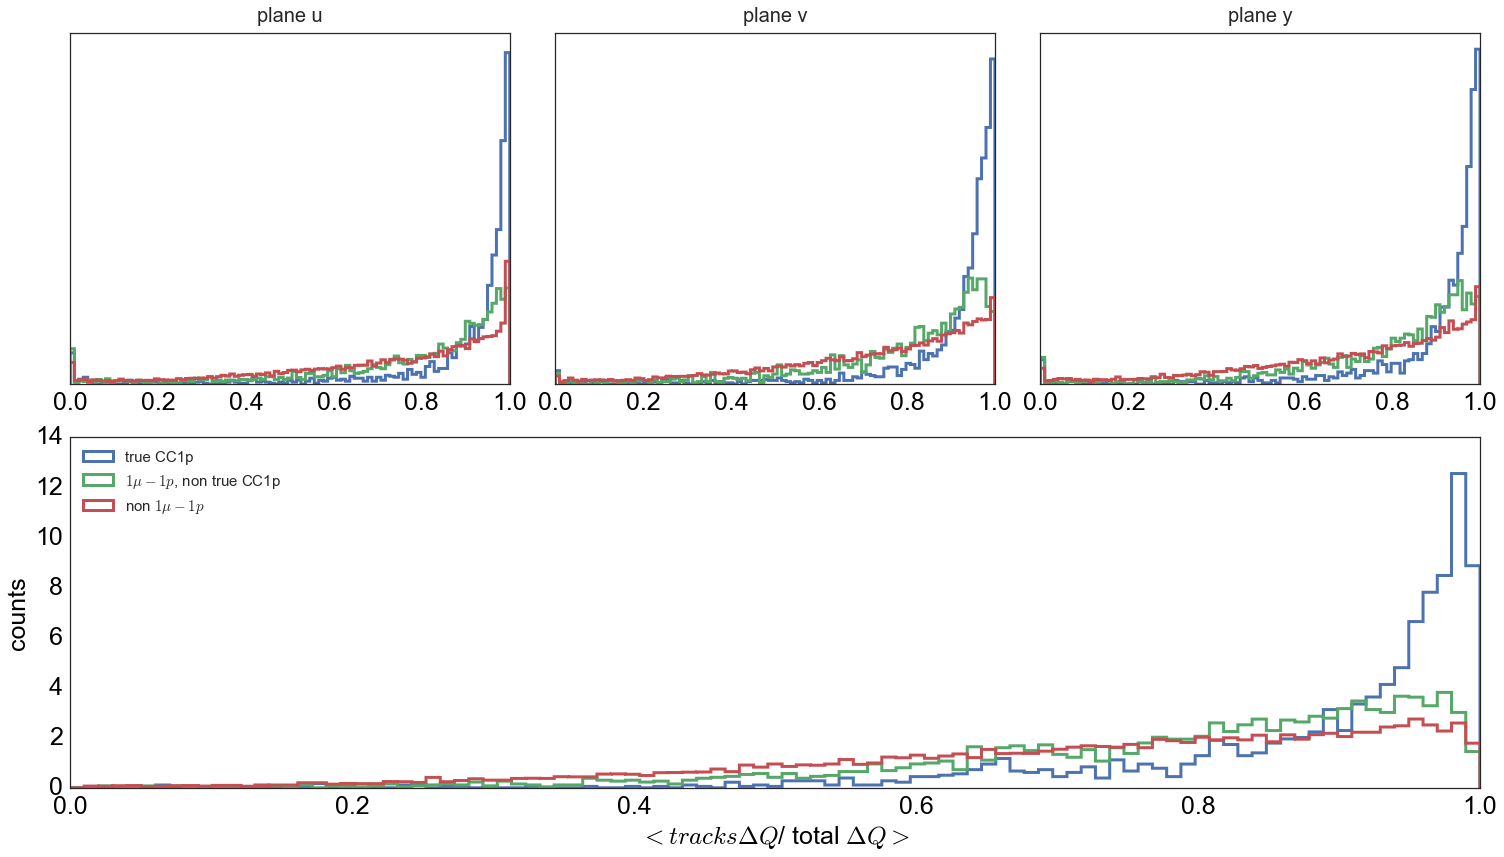

In [18]:
fig=plt.figure(figsize=(21,12))
bins=np.linspace(0,1.,100)
for i,plane in enumerate(['u','v','y']):
    ax = fig.add_subplot(2,3,i+1)
    plt.hist(MCeventsTrueCC1p['ratio_associated_hit_charge_to_total_'+plane],bins=bins,histtype='step',linewidth=3,normed=1,label='true CC1p')
    plt.hist(MCeventsNonTrueCC1p1mu1p['ratio_associated_hit_charge_to_total_'+plane],bins=bins,histtype='step',linewidth=3,normed=1,label='$1\\mu-1p$, non true CC1p')
    plt.hist(MCeventsNon1mu1p['ratio_associated_hit_charge_to_total_'+plane],bins=bins,histtype='step',linewidth=3,normed=1,label='non $1\\mu-1p$')
    set_axes(ax,x_label='',y_label='')
    ax.set_title('plane '+plane,y=1.02,fontsize=20)
    ax.yaxis.set_major_formatter( NullFormatter() )
# plt.figtext(0.3,0.01,'tracks-associated $\\Delta Q$/ total $\\Delta Q$ deposited',fontsize=25)
ax = fig.add_subplot(2,3,(4,6))
plt.hist(MCeventsTrueCC1p['average_ratio_associated_hit_charge_to_total'],bins=bins,histtype='step',linewidth=3,normed=1,label='true CC1p')
plt.hist(MCeventsNonTrueCC1p1mu1p['average_ratio_associated_hit_charge_to_total'],bins=bins,histtype='step',linewidth=3,normed=1,label='$1\\mu-1p$, non true CC1p')
plt.hist(MCeventsNon1mu1p['average_ratio_associated_hit_charge_to_total'],bins=bins,histtype='step',linewidth=3,normed=1,label='non $1\\mu-1p$')
set_axes(ax,x_label='$<tracks \\Delta Q$/ total $\\Delta Q>$',y_label='counts')
plt.legend(loc='upper left',fontsize=15)
plt.tight_layout()